# Navigation

---

### 1. Dependencies

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

import matplotlib.pyplot as plt
import torch
%matplotlib inline

from dqn_agent import Agent
from collections import deque


tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Train

Run the code cells below to train the agent in the environment.

In [7]:
env_info = env.reset(train_mode=True)[brain_name]
agent = Agent(state_size=len(env_info.vector_observations[0]), action_size=brain.vector_action_space_size, seed=0)

In [8]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0] 
            done = env_info.local_done[0]
            #next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    return scores

scores = dqn()

torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')

Episode 100	Average Score: 0.92
Episode 200	Average Score: 3.71
Episode 300	Average Score: 7.13
Episode 400	Average Score: 10.64
Episode 500	Average Score: 13.60
Episode 600	Average Score: 14.32
Episode 700	Average Score: 14.52
Episode 800	Average Score: 15.67
Episode 900	Average Score: 15.24
Episode 1000	Average Score: 15.93
Episode 1100	Average Score: 16.17
Episode 1200	Average Score: 16.02
Episode 1300	Average Score: 15.97
Episode 1400	Average Score: 15.85
Episode 1500	Average Score: 15.45
Episode 1600	Average Score: 15.66
Episode 1700	Average Score: 14.89
Episode 1800	Average Score: 15.50
Episode 1900	Average Score: 15.60
Episode 2000	Average Score: 16.21


### 3. Display training graph

Run the code cell below to display agents score through training.

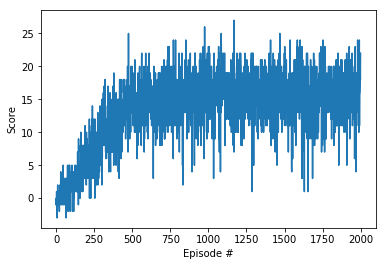

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Replay saved

In [19]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

In [ ]:
scores = []                        # list containing scores from each episode
scores_window = deque(maxlen=100)  # last 100 scores
num_runs = 100
max_t_in_ep = 1000

for i in range(1, num_runs+1):
    env_info = env.reset(train_mode=True)[brain_name]
    state = env_info.vector_observations[0]
    score = 0
    for t in range(max_t_in_ep):
        action = agent.act(state, 0.01)
        env_info = env.step(action)[brain_name]
        next_state = env_info.vector_observations[0]
        reward = env_info.rewards[0] 
        done = env_info.local_done[0]
            
        state = next_state
        score += reward
        if done:
            break 
                
    scores_window.append(score)       # save most recent score
    scores.append(score)              # save most recent score
        
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i, np.mean(scores_window)), end="")
    if i % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i, np.mean(scores_window)))

### 5. Display scores graph

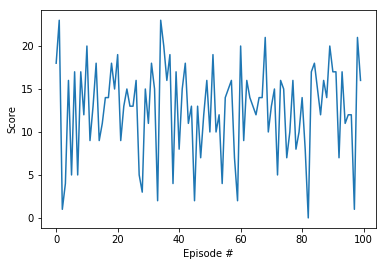

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

When finished, you can close the environment.

In [6]:
env.close()